## <center> Financial Distress  </center> ## 
### <center> Akhilesh Bhaugeerutty  </center> ###

Ce projet de Machine Learning concerne la viabilité financière - plus particulièrement le risque - de plusieurs companies. Nous allons essayer d'analyser et comprendre les données afin d'essayer de prédire si une companie est en danger ou pas. <br>
Les questions primordiales abordées ici seront: 
1. Quelles variables sont les plus indicatives d'un danger potentiel? 
2. Quel modèle de Machine Learning est le plus efficace & précis?

Le DataFrame utilisé a été téléchargé depuis Kaggle.(https://www.kaggle.com/shebrahimi/financial-distress)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings #ignorer les messages d'erreur
warnings.filterwarnings("ignore") 

data = pd.read_csv("C:/Users/Akhilesh/Downloads/Financial Distress.csv")
tmp = data.copy()
data.head()

,Company,Time,Financial Distress,x1,x2,x3,x4,x5,x6,x7,...,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83
0,1,1,0.010636,1.2810,0.022934,0.87454,1.21640,0.060940,0.188270,0.52510,...,85.437,27.07,26.102,16.000,16.0,0.2,22,0.060390,30,49
1,1,2,-0.455970,1.2700,0.006454,0.82067,1.00490,-0.014080,0.181040,0.62288,...,107.090,31.31,30.194,17.000,16.0,0.4,22,0.010636,31,50
2,1,3,-0.325390,1.0529,-0.059379,0.92242,0.72926,0.020476,0.044865,0.43292,...,120.870,36.07,35.273,17.000,15.0,-0.2,22,-0.455970,32,51
3,1,4,-0.566570,1.1131,-0.015229,0.85888,0.80974,0.076037,0.091033,0.67546,...,54.806,39.80,38.377,17.167,16.0,5.6,22,-0.325390,33,52
4,2,1,1.357300,1.0623,0.107020,0.81460,0.83593,0.199960,0.047800,0.74200,...,85.437,27.07,26.102,16.000,16.0,0.2,29,1.251000,7,27


In [2]:
data.describe().head(2)

,Company,Time,Financial Distress,x1,x2,x3,x4,x5,x6,x7,...,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83
count,3672.000000,3672.000000,3672.000000,3672.00000,3672.000000,3672.000000,3672.00000,3672.000000,3672.000000,3672.000000,...,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000
mean,182.084423,7.528322,1.040257,1.38782,0.129706,0.615769,0.86816,0.154949,0.106717,0.784031,...,86.839822,91.920506,89.115908,17.780855,15.198708,-2.664305,19.714597,1.100488,13.122277,33.044935


Il y a 3672 données, avec la première colonne indiquant l'entreprise, la troisième colonne, la variable cible, c'est à dire celle qui dit si la compagnie est en danger, et le reste des colonnes sont des données financières recensées. Il y a additionnellement une colonne qui marque la période de temps étudiée. <br>
La variable cible est une variable quantitative, avec un indicateur de *distress* > - 0.5 indiquant que l'entreprise est en *bonne santé*. 

### L'importance du temps

Avant de commencer tout modèle, la variable du temps nécessite une attention particulière. En effet, si elle a vraiment un effet sur la Financial Distress de l'entreprise, on pourrait traîter le problème comme des séries temporelles, mais ce qui compliquerait considérablement la tâche. 

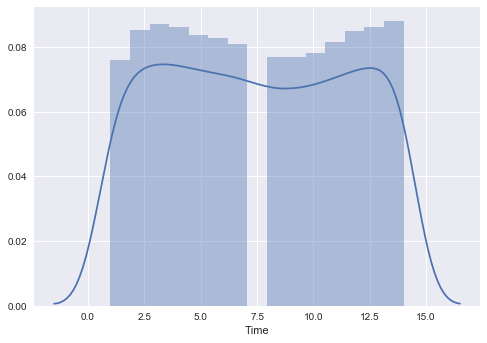

In [3]:
sns.distplot(data['Time'])
plt.show()

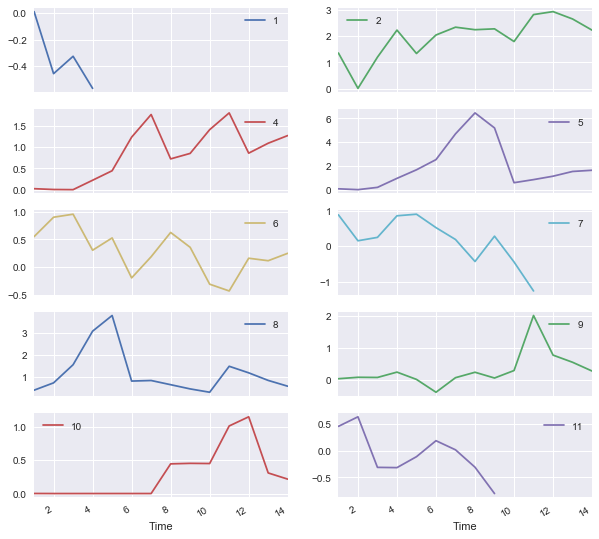

In [2]:
x = data[data['Company'] <= 11]
x = x[x['Company'] != 3]

pd.pivot_table(x.reset_index(),index='Time', columns ='Company', values='Financial Distress').plot(subplots=True, figsize=(10,10), layout=(5,2 ))
plt.show()

Le premier graphique vérifie si le recensement du temps est uniformément réparti (dans ce cas, à peu près oui).<br>
Le deuxième, plus intéressant, trace la Financial Distress des 10 premières entreprises en fonction de leur temps. Il n'y a pas de tendance similaire flagrante. Pour confirmer ces résultats, on regarde la corrélation entre le temps et la Financial Distress: 

In [6]:
x = data[["Time", "Financial Distress"]]
x.corr()

,Time,Financial Distress
Time,1.0000,0.1442
Financial Distress,0.1442,1.0000


La corrélation est assez faible (0.14), donc nous allons retirer la variable afin de décomplexifier les modèles. 

### Préparation des données

Après avoir retiré la variable de temps du modèle, on considère maintenant que la variable 'Company' ajoutera un biais inutile - nous avons seulement besoin des données financières, et non pas du nom de l'entreprise. De plus, la variable 'x80', étant catégorique, sera aussi retirée. <br> 
Après ce premier nettoyage, nous allons diviser le dataframe en échantillons d'apprentissage et de test, puis commencer les modèles. 

In [3]:
data.drop(['Time', 'Company', 'x80'], axis=1, inplace = True)

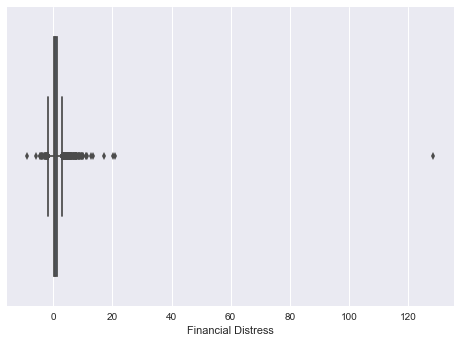

In [13]:
sns.boxplot(x=data['Financial Distress'])
plt.show()

Il y a un outlier, son Financial Distress est supérieur à 120, nous allons le supprimer afin de ne pas fausser les résultats. 

In [15]:
from sklearn.preprocessing import StandardScaler 

data = data.drop(data.index[2884])
X = data.drop(['Financial Distress'], axis = 1)
Y = data['Financial Distress']
Y_dis = np.where(Y >= -0.5, 0, 1)

s = StandardScaler() 
s.fit(X) 
X = s.transform(X) 

Cette dernière instruction permet de scale les données. Ce n'est pas obligatoire mais a des avantages lors de certains algorithmes..

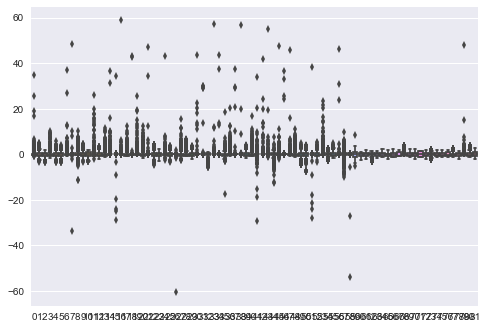

In [8]:
sns.boxplot(data = X)
plt.show()

Les données sont assez bien normalisées, il n'y a pas de véritable écart constant avec 0, donc on peut continuer.

### Machine Learning

La variable 'Financial Distress' est une variable quantitative, donc la régression semble être le choix le plus évident. Toutefois, nous voulons savoir si l'entreprise est en danger ou pas (Financial Distress < - 0.5) donc une classification sera efficace. <br>
Les méthodes utilisées et comparées seront: 
    1. Forêts Aléatoires
    2. Gradient Boosting Trees
    3. Support Vector Machines
Ces algorithmes ont la particularité d'être des méthodes de classification & de régression. 

#### Regressions:
Nous allons tester les modèles. Pour trouver les meilleurs paramètres nous allons directement faire une Cross Validation. 

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import r2_score 
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor 

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size= 0.3)


rdfr = RandomForestRegressor()
para_rf = {'n_estimators':list(range(40,80)),'max_depth':list(range(3,12)),'max_features':list(range(5,12))}
rf = GridSearchCV(estimator=rdfr,param_grid=para_rf,scoring='r2')
rf.fit(X_train,Y_train)

svmr = SVR()
para_svr = {'kernel':['linear', 'rbf'],'C':list(range(1,50)), 'gamma':['scale'],'epsilon':np.linspace(1,12,30)}
svr = GridSearchCV(estimator=svmr,param_grid=para_svr,scoring='r2') 
svr.fit(X_train,Y_train)


GBRe = GradientBoostingRegressor()
para_gbr = {'n_estimators':[100], 'learning_rate': [0.1, 0.05, 0.01],'max_depth':[4, 6, 8],'min_samples_leaf':[3,5,9,17],
            'max_features':[1.0, 0.3] } 
gbr = GridSearchCV(estimator=GBRe,param_grid=para_gbr,scoring='r2') 
gbr.fit(X_train,Y_train)

In [ ]:
rf.best_params_
#{'max_depth': 10, 'max_features': 11, 'n_estimators': 71}

In [ ]:
gbr.best_params_
#{'learning_rate': 0.05,'max_depth': 6,'max_features': 1.0,'min_samples_leaf': 17,'n_estimators': 100}

In [ ]:
svr.best_params_
#{'kernel':'rbf', 'gamma': 0.001, 'epsilon': 0.2}

#### Classifications
Pour faire une classification, on va changer recoder la variable cible, qui sera égale à 0 si l'entreprise est en bonne santé, et 1 sinon. Ensuite, une Cross-Validation sera à nouveau effectuée afin de chercher les meilleurs paramètres. Il est important ici de faire une Stratified Cross-Validation afin de garder les mêmes proportions de classe, les résultats seront faussés sinon. 

In [136]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC 


X_train, X_test, Y_train, Y_test = train_test_split(X, Y_dis, test_size=0.3, stratify=Y_dis)


para_rfc = {'n_estimators':list(range(3,2000)),'max_depth':list(range(3,10)),'max_features':list(range(5,20)),'criterion':['gini','entropy']}
rdf = RandomForestClassifier(class_weight = 'balanced')
clf = GridSearchCV(rdf, param_grid = para_rfc,scoring='f1_micro')
clf.fit(X_train, Y_train)

para_gbc = {'n_estimators':list(range(80,120)), 'max_depth':list(range(3,8)),'loss':['deviance','exponential'], 'learning_rate': [0.1]}
gbt = GradientBoostingClassifier()
gbc = GridSearchCV(gbt, param_grid = para_gbc,scoring='f1_micro')
gbc.fit(X_train,Y_train)

para_svc = {'kernel':['poly','rbf', 'linear'],'C':np.linspace(0.1,10,10),'degree':np.linspace(1,9,10),'gamma':np.linspace(0.01,8,10)}
svm_clf = SVC()
svc = GridSearchCV(estimator=svm_clf,param_grid=para_svc,scoring='f1_micro',cv=5)
svc.fit(X_train,Y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119], 'max_depth': [3, 4, 5, 6, 7], 'loss': ['deviance', 'exponential'], 'learning_rate': [0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1_micro', verbose=0)

In [127]:
clf.best_params_
#{'criterion': 'entropy', 'max_depth': 8, 'max_features': 6, 'n_estimators': 11}

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 6, 'n_estimators': 11}

In [137]:
gbc.best_params_
#{'learning_rate': 0.1,'loss': 'exponential','max_depth': 5, 'n_estimators': 117}

{'learning_rate': 0.1,
 'loss': 'exponential',
 'max_depth': 5,
 'n_estimators': 117}

In [ ]:
svc.best_params_
#{'gamma': 0.01, 'kernel': 'poly', 'C': 1.0}

### Performance & Review

Maintenant que les modèles ont été établis et ont appris des données, évaluons leur performance. Quelques précisions: 

1. Pour les classifications, si l'on regarde l'accurary, on aurait tendance à penser que nos résultats ont été excellents pour tous nos modèles:

    

In [201]:
clf = RandomForestClassifier(criterion= 'entropy', max_depth = 8, max_features= 6, n_estimators=1000, class_weight = 'balanced')
clf.fit(X_train, Y_train)

gbc = GradientBoostingClassifier(learning_rate= 1, loss= 'exponential',max_depth = 5, n_estimators= 117)
gbc.fit(X_train, Y_train)

svc = SVC(class_weight = 'balanced', gamma = 0.01, kernel = 'poly')
svc.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.01, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [202]:
from sklearn.metrics import accuracy_score 

print('RF Accuracy:', accuracy_score(Y_test,clf.predict(X_test)))
print('GB Accuracy:', accuracy_score(Y_test,gbc.predict(X_test)))
print('SVC Accuracy:', accuracy_score(Y_test,svc.predict(X_test)))

RF Accuracy: 0.953720508167
GB Accuracy: 0.9555353902
SVC Accuracy: 0.940108892922


Le F-Score toutefois montre des résultats bien différents: 

In [203]:
from sklearn.metrics import f1_score

print('RF F-score:',f1_score(Y_test,clf.predict(X_test)))
print('GB F-score:',f1_score(Y_test,gbc.predict(X_test)))
print('SVC F-score:',f1_score(Y_test,svc.predict(X_test)))

RF F-score: 0.337662337662
GB F-score: 0.246153846154
SVC F-score: 0.440677966102


Que s'est-il passé? <br>
En fait, les données ne sont pas vraiment adaptées pour regarder la précision. On a recensé bien plus d'entreprises en bonne santé que les autres... 'The data is unbalanced'. C'est pour cela que le f-score est plus utile. Il est calculé ainsi : 
$$ F_{score} = 2* \frac{precision * recall}{precision + recall} \hspace{0.2cm}avec \hspace{0.2cm}\left\{
    \begin{array}{ll}
        precision = \frac{tp}{tp+fp} \\
        recall = \frac{tp}{tp+fn}
 \end{array}
\right. $$

Pour mieux comprendre, regardons les matrices de confusion: 

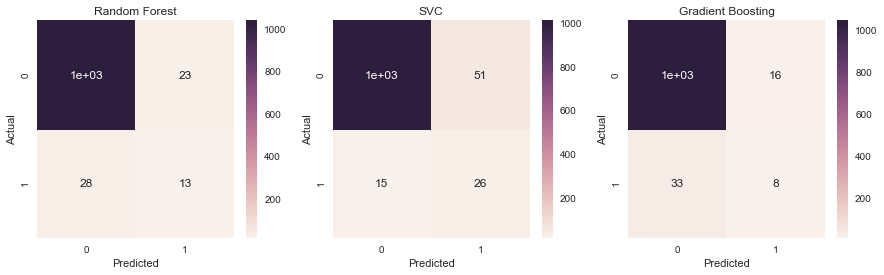

In [214]:
from sklearn.metrics import confusion_matrix

datarf, datasvm, datagbc = {'Actual': Y_test,'Predicted': clf.predict(X_test)},{'Actual': Y_test,'Predicted': svc.predict(X_test)},{'Actual': Y_test,'Predicted': gbc.predict(X_test)} 
df1 = pd.DataFrame(datarf, columns=['Actual','Predicted'])
df2 = pd.DataFrame(datasvm, columns=['Actual','Predicted'])
df3 = pd.DataFrame(datagbc, columns=['Actual','Predicted'])
m1 = pd.crosstab(df1['Actual'], df1['Predicted'], rownames=['Actual'], colnames=['Predicted'])
m2 = pd.crosstab(df2['Actual'], df2['Predicted'], rownames=['Actual'], colnames=['Predicted'])
m3 = pd.crosstab(df3['Actual'], df3['Predicted'], rownames=['Actual'], colnames=['Predicted'])

fig, ax =plt.subplots(1,3, figsize=(15,4))
sns.heatmap(m1, annot=True, ax=ax[0])
ax[0].title.set_text('Random Forest')
sns.heatmap(m2, annot=True, ax=ax[1])
ax[1].title.set_text('SVC')
sns.heatmap(m3, annot=True, ax=ax[2])
ax[2].title.set_text('Gradient Boosting')

fig.show()
plt.show()

Les trois algorithmes font beaucoup d'erreur de prediction pour la classe positive (l'entreprise est en danger). Le meilleur algorithme est toutefois celui de Support Vector Machine, qui réussit à mieux prédire & possède un F-Score plus élevé. 

<br>   2. Pour les modèles de régression, nous pouvons comparer les modèles en fonction du $R^2$. En effet, les modèles étant tous de même dimension, c'est un bon indicateur quant à la capacité de prédiction. Toutefois, la précision exacte de la prediction importe peu, nous avons surtout besoin d'avoir l'indicatrice. Il faut donc tester des seuils différents (la régression peut décaler le seuil où 'la compagnie est en bonne santé) et prendre celui où le F-Score est le plus élevé. 

Nous allons donc utiliser les mêmes indices de performance que pour la régression, à savoir le F-score, et precision/recall. On trace un graphique qui donne la précision, le recall en axes, et le F-score pour chaque seuil. 


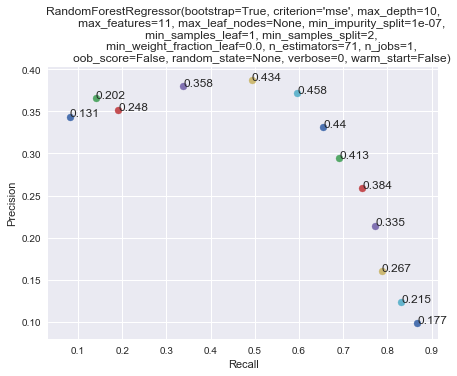

best performance: 
[[3399  137]
 [  55   81]]


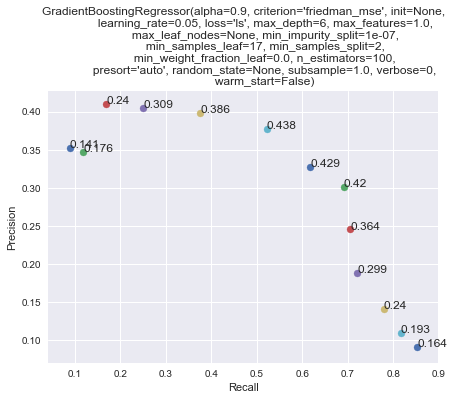

best performance: 
[[3419  117]
 [  65   71]]


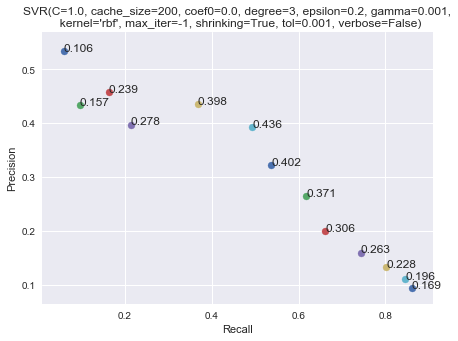

best performance: 
[[3432  104]
 [  69   67]]

RF: 0.457627118644 [-0.25]
GBR: 0.438271604938 [-0.25]
SVR: 0.436482084691 [-0.25]


In [215]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix


def performance(mod, X, Y):
    lim = np.arange(-0.75,0.5,0.1) 
    precisions = np.zeros_like(lim)
    recalls = np.zeros_like(lim)
    f1_scores = np.zeros_like(lim)
    confusion = []
    pred = cross_val_predict(mod, X, Y, cv = 5)
     
    fig, ax = plt.subplots(figsize=(7, 5))
    for i in range(len(lim)):
        predicted = (pred < lim[i]).astype(int)
        precisions[i] = precision_score(Y_dis, predicted)
        confusion.append(confusion_matrix(Y_dis, predicted))
        recalls[i] = recall_score(Y_dis, predicted)
        f1_scores[i] = f1_score(Y_dis, predicted)
        plt.scatter(recalls[i], precisions[i])
        ax.annotate(round(f1_scores[i], 3),(recalls[i], precisions[i]))
    
    plt.xlabel('Recall')    
    plt.ylabel('Precision')
    plt.title(mod)
    plt.show()
    print('best performance: ')
    print(confusion[np.where(f1_scores == max(f1_scores))[0]]) #meilleure matrice de confusion obtenue
    return(max(f1_scores), lim[np.where(f1_scores == max(f1_scores))])
    
rdf = RandomForestRegressor(max_depth = 10, max_features = 11, n_estimators = 71)
gbr = GradientBoostingRegressor(learning_rate= 0.05,max_depth= 6,max_features= 1.0,min_samples_leaf= 17)
svr = SVR(kernel='rbf', epsilon = 0.2, gamma = 0.001)

r,ind1 = performance(rdf,X,Y)
g,ind2 = performance(gbr,X,Y)
s,ind3 = performance(svr,X,Y)
print()
print('RF:', r, ind1)
print('GBR:', g, ind2)
print('SVR:', s, ind3)

Les trois graphiques ont à peu près la même allure, ce qui est normal. Les 3 algorithmes atteignent leur F-Score maximal au même seuil, -0.25, ce qui veut dire qu'après régression, l'algorithme classifie mieux si le seuil 'compagnie en bonne santé' est à -0.25 et non -0.5. La qualité de prédiction moyenne est donc maximale quand on a décale de 0.25 l'indicateur. 

La Forêt Aléatoire a le meilleur F-score maximal, mais les différences ne sont pas si importantes. 

**Premier bilan:**
Ni la classification, ni la régression ont permis d'aboutir à des résultats très satisfaisants. Nous aurions pu tester d'autres algorithmes, comme Lasso, ou des réseaux de neurones sauf que les algorithmes ici choisis sont réputés pour être les plus efficaces. La régression a quand même l'air d'être plus stable que la classification, surtout après modification du seuil de positivité. <br>
Peut-être que les données sont trop aléatoires pour en tirer des calculs raisonnables. Mais avant d'abandonner, il faut d'abord changer d'approche: la séléction de variable. 
<br><br>
Il y a effectivement plus de 80 variables pour seulement ~3000 données, ce qui est beaucoup trop. Nous allons donc prendre les variables les plus pertinantes et recommencer nos modèles. Cette sélection de variables combinera deux méthodes: une corrélation 'heatmap', et un processus récursif d'élimination de variable. 

### Feature Selection

Il existe plusieurs algorithmes de séléction de variable, et plusieurs méthodes (PCA, correlation matrix, RFE..). Ici nous allons implémenter un algorithme de RFE (Recursive Feature Elimination) et un autre de Sélection par Forêt aléatoire, et relancer les calculs. 

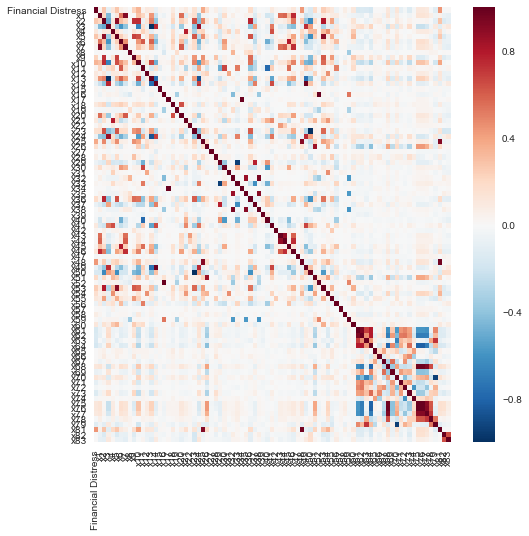

In [323]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr())
plt.show()

Il y a plusieurs endroits 'blancs', où la corrélation est faible avec Financial Distress. De plus, certaines variables sont très correlées entre elles. Lançons à présent les Sélections de variables: 

In [257]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
clf = ExtraTreesClassifier(n_estimators=1000, class_weight = 'balanced', criterion= 'entropy', max_depth = 8, max_features= 6)
clf = clf.fit(X, Y_dis)
model = SelectFromModel(clf, prefit=True)
X_n1 = model.transform(X)
print("Optimal number of features :", X_n1.shape[1])

Optimal number of features : 19


In [258]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

svc = SVC(class_weight = 'balanced', gamma = 0.01, kernel = 'poly')
rfecv = RFECV(estimator=svcc, step=1, cv=StratifiedKFold(2), scoring='f1_micro')
rfecv.fit(X, Y_dis)
X_n2 = rfecv.transform(X)
print("Optimal number of features :", rfecv.n_features_)

Optimal number of features : 15


#### Comparaison: 

    1. Classification: 

In [289]:
X_train, X_test, Y_train, Y_test = train_test_split(X_n1, Y_dis, test_size=0.3, stratify=Y_dis)

clf = RandomForestClassifier(criterion= 'entropy', max_depth = 8, max_features= 12, n_estimators=1000, class_weight = 'balanced')
clf.fit(X_train, Y_train)
gbc = GradientBoostingClassifier(learning_rate= 0.1, loss= 'exponential',max_depth = 5, n_estimators= 117)
gbc.fit(X_train, Y_train)
svc = SVC(class_weight = 'balanced', gamma = 0.01, kernel = 'poly')
svc.fit(X_train, Y_train)

x1 = [accuracy_score(Y_test,clf.predict(X_test)),accuracy_score(Y_test,gbc.predict(X_test)), accuracy_score(Y_test,svc.predict(X_test))]
x2 = [f1_score(Y_test,clf.predict(X_test)),f1_score(Y_test,gbc.predict(X_test)), f1_score(Y_test,svc.predict(X_test))]


X_train, X_test, Y_train, Y_test = train_test_split(X_n2, Y_dis, test_size=0.3, stratify=Y_dis)

clf = RandomForestClassifier(criterion= 'entropy', max_depth = 8, max_features= 12, n_estimators=1000, class_weight = 'balanced')
clf.fit(X_train, Y_train)
gbc = GradientBoostingClassifier(learning_rate= 0.1, loss= 'exponential',max_depth = 5, n_estimators= 117)
gbc.fit(X_train, Y_train)
svc = SVC(class_weight = 'balanced', gamma = 0.01, kernel = 'poly')
svc.fit(X_train, Y_train)

x3 = [accuracy_score(Y_test,clf.predict(X_test)),accuracy_score(Y_test,gbc.predict(X_test)), accuracy_score(Y_test,svc.predict(X_test))]
x4 = [f1_score(Y_test,clf.predict(X_test)),f1_score(Y_test,gbc.predict(X_test)), f1_score(Y_test,svc.predict(X_test))]

In [5]:
Algo = ['Random Forest', 'Gradient Boosting', 'Support Vector']

index_arrays = [np.array(['Forest', 'Forest', 'RFE', 'RFE']), np.array(['Accuracy','F1','Accuracy','F1'])]
df1 = pd.DataFrame([x1,x2,x3,x4], columns=Algo, index=index_arrays)
df1

Random Forest  Gradient Boosting  Support Vector
Forest Accuracy       0.961887           0.962795        0.933757
       F1             0.560000           0.327869        0.486504
RFE    Accuracy       0.942831           0.962795        0.961887
       F1             0.463636           0.280702        0.375862

On obtient des meilleurs résultats partout, (surtout pour la sélection par Forêt), et grandement réduit le temps de calcul. 
Le F-Score a quelque peu augmenté. 

    2. Regression

In [295]:
def performance2(mod, X, Y):
    lim = np.arange(-0.75,0.5,0.1) 
    precisions = np.zeros_like(lim)
    recalls = np.zeros_like(lim)
    f1_scores = np.zeros_like(lim)
    confusion = []
    pred = cross_val_predict(mod, X, Y, cv = 5)
     
    for i in range(len(lim)):
        predicted = (pred < lim[i]).astype(int)
        precisions[i] = precision_score(Y_dis, predicted)
        confusion.append(confusion_matrix(Y_dis, predicted))
        recalls[i] = recall_score(Y_dis, predicted)
        f1_scores[i] = f1_score(Y_dis, predicted)
    return(max(f1_scores), lim[np.where(f1_scores == max(f1_scores))])

r,ind1 = performance2(rdf,X_n1,Y)
g,ind2 = performance2(gbr,X_n1,Y)
s,ind3 = performance2(svr,X_n1,Y)
x1 = [r,g,s]
x2 = [ind1[0], ind2[0], ind3[0]]

r,ind1 = performance2(rdf,X_n2,Y)
g,ind2 = performance2(gbr,X_n2,Y)
s,ind3 = performance2(svr,X_n2,Y)
x3 = [r,g,s]
x4 = [ind1[0], ind2[0], ind3[0]]


In [8]:
Algo = ['Random Forest', 'Gradient Boosting', 'Support Vector']

index_arrays = [np.array(['Forest', 'Forest', 'RFE', 'RFE']), np.array(['F1','Seuil','F1','seuil'])]
df2 = pd.DataFrame([x1,x2,x3,x4], columns=Algo, index=index_arrays)
df2

Random Forest  Gradient Boosting  Support Vector
Forest F1          0.564000           0.430233        0.443800
       Seuil      -0.250000          -0.250000       -0.050000
RFE    F1          0.452368           0.459333        0.484615
       seuil      -0.250000          -0.250000       -0.050000

On obtient des meilleurs résultats partout, (surtout pour la sélection par Forêt), et grandement réduit le temps de calcul. 
Le F-Score a quelque peu augmenté. 

### Conclusion: 

La sélection de variables a été une étape réussie. En effet, même si les résultats ne sont pas nettement meilleurs, nous avons considérablement réduit le nombre de features, (respectivement 15 & 19 au lieu de 83), ce qui a accéleré les calculs. Concernant la prédiction, nous ne pouvons pas vraiment tirer une conclusion particulièrement  positive, car le recensement des entreprises a posé problème, et nos modèles n'ont pas vraiment fit avec les données. En général, la forêt aléatoire a été le meilleur algorithme, puis les Support Vector Machines, alors que les Gradient Boosting Trees ont rarement impressionné. 

<link rel="stylesheet" href="https://cdn.jupyter.org/notebook/5.1.0/style/style.min.css">